<a href="https://colab.research.google.com/github/CLAUDERNORONHA/PROJETO/blob/main/An%C3%A1lisedVendasSuperStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clauder Noronha

Análise de Vendas Super Store


Analise os dados de vendas do Super Store Mart e identifique oportunidades para impulsionar o crescimento dos negócios

Introdução:



A Super Store é uma pequena empresa de varejo localizada nos Estados Unidos. Eles vendem Móveis, Material de Escritório e Produtos de Tecnologia e seus clientes são Consumidores de Massa, Escritórios Corporativos e Domésticos.


O conjunto de dados contém vendas, lucro e informações geográficas da Super Store.

Nossa tarefa é analisar os dados de vendas e identificar áreas fracas e oportunidades para a Super Store impulsionar o crescimento do negócio.



**Perguntas de negócios**

 * Qual categoria é a mais vendida e mais lucrativa?

* Quais são as subcategorias mais vendidas e mais lucrativas?

* Qual é a subcategoria mais vendida?

* Qual segmento de clientes é mais lucrativo?

* Qual é o modo de envio preferido?

* Qual região é a mais lucrativa?

* Qual cidade tem o maior número de vendas?

* Quem está lendo esta análise?


Assumimos que a Super Store é uma empresa familiar e pertence a 1 ou 2 proprietários que investem muito em seus negócios.


Os proprietários provavelmente não são especialistas em leitura de gráficos ou interpretação de análises estatísticas, portanto, nossa análise será em termos leigos e fácil de entender.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

EXPLORANO OS DADOS

In [3]:
dados = pd.read_csv('/content/drive/MyDrive/1-CIENCIA DE DADOS-CURSOS_ESTUDO DE CASO/ESTUDO DE CASO/Análise de Vendas Super Store/SampleSuperstore.csv')
dados.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
#Visualizar 5 ultimas linhas

dados.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


Pode facilmente dizer que existe uma mistura de variáveis ​​categóricas, geográficas e numéricas.
Cada linha representa um pedido de um item e a quantidade, vendas, desconto e lucro correspondentes. Há também o modo de envio, segmento do cliente e aspectos geográficos.

In [8]:
#Quantidade de linhas e colunas
 
dados.shape

(9994, 13)

In [9]:
#Informação basica do Dataset

dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


LIMPEZA DOS DADOS

In [11]:
dados.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Não existe dados nulos

DADOS DUPLICADOS 

In [12]:
dados.duplicated().sum()

17

O resultado mostra que existem 17 linhas duplicadas. Vamos executar outra função para visualizar os dados duplicados.

MOstrar os dados Duplicados

In [13]:
dados[dados.duplicated(keep = 'last')]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.2208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
3405,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588


Em seguida, executaremos a função drop_duplicates () para eliminar as linhas duplicadas.

In [15]:
#Eliminar as linhas duplicadas 

dados.drop_duplicates(inplace=True)


dados.shape
#A exclusão aconteceu 

(9977, 13)

Campo Calculado

Agora, vamos criar um campo calculado para a margem de lucro. A fórmula é (Lucro / Vendas) * 100.

In [17]:
dados['Profit Margin %'] = (dados.Profit / dados.Sales) * 100 

dados.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin %
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25


Agora que o conjunto de dados foi limpo, podemos prosseguir com algumas análises estatísticas!


Estatísticas descritivas

Aqui, faremos uma análise estatística descritiva. Usamos df.describe () e atribuímos 'include =' all 'para garantir que os recursos categóricos também sejam incluídos na saída.

In [21]:
dados.describe(include='all').round(2)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin %
count,9977,9977,9977,9977,9977,9977.00,9977,9977,9977,9977.00,9977.00,9977.00,9977.00,9977.00
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN,NaN
freq,5955,5183,9977,914,1996,NaN,3193,6012,1522,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55154.96,NaN,NaN,NaN,230.15,3.79,0.16,28.69,12.01
std,NaN,NaN,NaN,NaN,NaN,32058.27,NaN,NaN,NaN,623.72,2.23,0.21,234.46,46.66
min,NaN,NaN,NaN,NaN,NaN,1040.00,NaN,NaN,NaN,0.44,1.00,0.00,-6599.98,-275.00
25%,NaN,NaN,NaN,NaN,NaN,23223.00,NaN,NaN,NaN,17.30,2.00,0.00,1.73,7.50
50%,NaN,NaN,NaN,NaN,NaN,55901.00,NaN,NaN,NaN,54.82,3.00,0.20,8.67,27.00
75%,NaN,NaN,NaN,NaN,NaN,90008.00,NaN,NaN,NaN,209.97,5.00,0.20,29.37,36.25


Verá 'NaN' em algumas das colunas categóricas e isso é perfeitamente normal. Os valores categóricos não devem ter cálculos realizados sobre eles, portanto, podemos ignorá-los.
O que queremos enfocar é a contagem e frequência únicas dos recursos categóricos, como
Existem 4 modos de envio e 3 segmentos de cliente. 

Quase metade dos pedidos são do segmento de consumidor usando remessa de classe padrão.
A loja possui 3 categorias de itens com 17 subcategorias. 60% dos pedidos são para material de escritório e pelo menos 15% das compras são para fichários.


Enquanto para parâmetros numéricos, é interessante notar que o
75% dos pedidos geram pelo menos 36% de margem de lucro.


Pedidos com prejuízo podem chegar a 275% de perdas. Devemos enfatizar essas vendas deficitárias para eliminá-las.
Faremos algumas análises abaixo para testar essas observações.


Análise exploratória de dados

Qual categoria é a mais vendida e mais lucrativa?
Mais vendido significa olhar para as vendas e mais lucrativo está se referindo ao lucro. Vamos agrupar Vendas, Lucro e também Quantidade por Categoria e executar as funções df.group (). Sum e pd.DataFrame ().

In [22]:
#Agrupar vendas. lucoros e quantidade por categorias

analise_categorica = pd.DataFrame(dados.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum())
analise_categorica

,Sales,Profit,Quantity
Category,,,
Furniture,741306.3133,18421.8137,8020
Office Supplies,718735.2440,122364.6608,22861
Technology,836154.0330,145454.9481,6939


Gráfico:

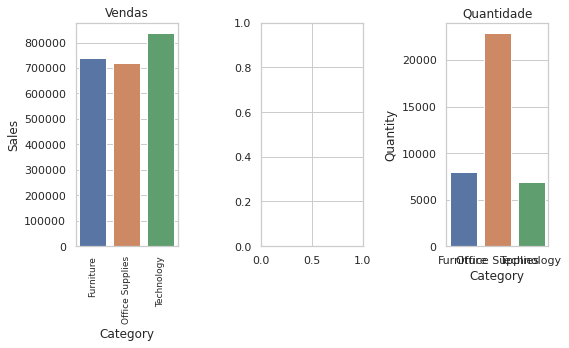

In [33]:
#Definir para o grafico agrupados - figura com uma grade 2X2 

sns.set_theme (style= 'whitegrid')
figure, axis = plt.subplots(1,3, figsize=(8,5))

#plot barplot
cat1 = sns.barplot (x = analise_categorica.index, y = analise_categorica.Sales, ax = axis [0]) 
#cat2 = sns.barplot (x = analise_categorica, y = analise_categorica.Profit, ax = axis [1]) 
cat3 = sns.barplot (x = analise_categorica.index, y = analise_categorica.Quantity, ax = axis [2])

# Definir títulos
cat1.set (title = 'Vendas') 
#cat2.set (title = 'Lucro') 
cat3.set (title = 'Quantidade')

# Rotacionar o eixo para o eixo x
plt.setp (cat1.get_xticklabels (), rotation = 'vertical', size = 9) 
#plt.setp (cat2.get_xticklabels (), rotation = 'vertical', size = 9) 
#plt.setp (cat3.get_xticklabels (), rotação = 'vertical', tamanho = 9)


# Defina o espaçamento entre subtramas
figure.tight_layout ()

Nossas observações são:

 * Todas as 3 categorias - Móveis, Material de Escritório e Tecnologia têm vendas semelhantes.

 * Tecnologia é a mais vendida e é bom saber que essa categoria também é a mais lucrativa. Apenas uma quantidade mínima é vendida, pois esses produtos geralmente são compras únicas que podem durar pelo menos 4-5 anos.

 * Embora Móveis faça vendas semelhantes às de Tecnologia, é o menos lucrativo e a quantidade vendida também é mínima.
O material de escritório vende mais em termos de quantidade, pois é um produto relativamente barato.

Quais são as subcategorias mais vendidas e mais lucrativas?

In [36]:
#Groupby subcategorias

subcategorias = pd.DataFrame(dados.groupby(['Sub-Category'])[['Sales', 'Profit']].sum())

#Calssificar em ORdem Decrescente de acordo com as vendas

subcategorias_vendas = pd.DataFrame(subcategorias.sort_values('Sales', ascending = False))
subcategorias_vendas

,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203409.1690,30228.0003
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


Temos um quadro de dados de vendas e lucors por subcategorias em ordem decrescente

In [38]:
#CLASSIFICAR EM ORDEM DECRESCENE DE ACORDO COM O LUCRO 

subcat_profit = pd.DataFrame(subcategorias.sort_values('Profit', ascending=False))
subcat_profit

,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,330007.0540,44515.7306
Accessories,167380.3180,41936.6357
Paper,78224.1420,33944.2395
Binders,203409.1690,30228.0003
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Appliances,107532.1610,18138.0054
Furnishings,91683.0240,13052.7230


Temos um quadro de dados de vendas e lucro por subcategorias em ordem crescente 

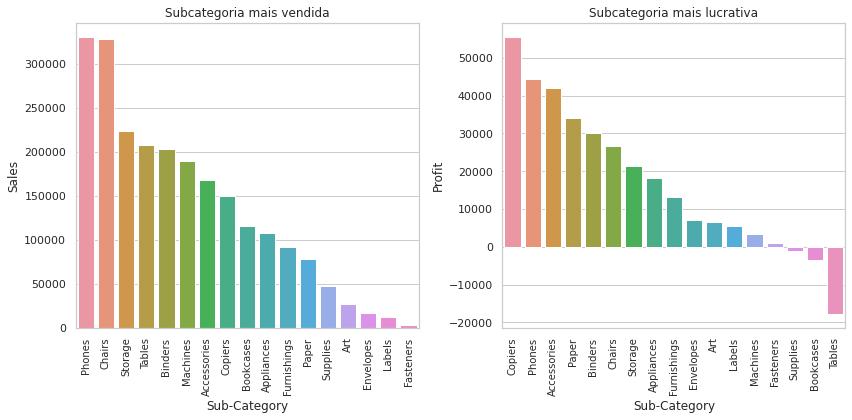

In [49]:
# Plot Bar Plots
sns.set_theme(style="whitegrid")


# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 6))


# Plot Bar Plot for Best Selling Sub-Category
subcat1 = sns.barplot(data = subcategorias_vendas, x = subcategorias_vendas.index, y = subcategorias_vendas.Sales, ax=axis[0])
subcat1.set(title="Subcategoria mais vendida")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)


# Plot Bar Plot for Most Profitable Sub-Category
subcat2 = sns.barplot(data = subcat_profit, x = subcat_profit.index, y = subcat_profit.Profit, ax=axis[1])
subcat2.set(title = "Subcategoria mais lucrativa")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)


# Set spacing between subplots
figure.tight_layout()
plt.show()

Vamos analisar os gráficos de barra:



 * Phones e Chairs são as 2 subcategorias mais vendidas.

 * As copiers geram mais lucro, seguidas por telefones, acessórios, papéis e pastas. A estratégia de marketing deve se concentrar no marketing desses produtos.


 * Na outra ponta do espectro, machines,Fasteners, suppliers, bookcases e Tables têm uma margem de perdas próxima de zero. Esses são produtos que a Super Store pode considerar descartar do catálogo de produtos ou aumentar o preço de venda e a margem de lucro ou barganhar por um preço mais baixo do fornecedor.

Qual é a subcategoria mais vendida?

In [46]:
#Colocar os resultados em ordem crescente
subcategoria_mais_vendida = pd.DataFrame(dados.groupby(['Sub-Category']) [['Quantity']].sum().sort_values('Quantity', ascending=False))
subcategoria_mais_vendida

,Quantity
Sub-Category,
Binders,5971
Paper,5144
Furnishings,3560
Phones,3289
Storage,3158
Art,2996
Accessories,2976
Chairs,2351
Appliances,1729


In [ ]:
Quantidade vendida para cada subcategoria 

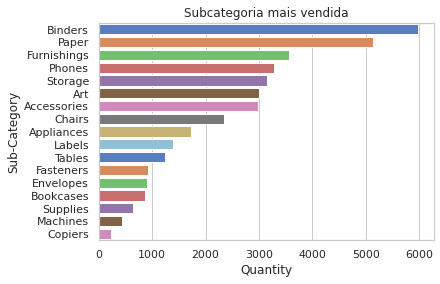

In [48]:
sns.set_theme(style="whitegrid")
sns.barplot(data = subcategoria_mais_vendida, y = subcategoria_mais_vendida.index, x = subcategoria_mais_vendida.Quantity, palette = "muted")
plt.title("Subcategoria mais vendida")
plt.show()

Qual segmento de cliente é mais lucrativo?

In [51]:
segmento_analitico = pd.DataFrame(dados.groupby(['Segment'])['Profit'].sum())
segmento_analitico

,Profit
Segment,
Consumer,134007.4413
Corporate,91954.9798
Home Office,60279.0015


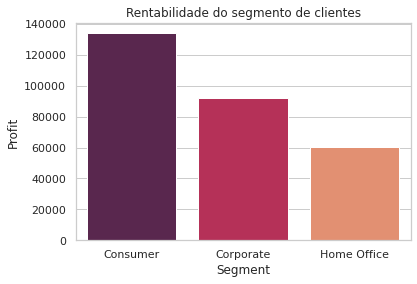

In [52]:
# Plot Bar Plot
sns.set_theme(style="whitegrid")
sns.barplot(data = segmento_analitico, x = segmento_analitico.index, y = segmento_analitico.Profit, palette = "rocket")
plt.title("Rentabilidade do segmento de clientes")
plt.show()

O segmento de consumo é o mais lucrativo, seguido pelo Segmento Corporativo e Home Office. Conseqüentemente, a estratégia de marketing deve ter como alvo ou enfocar mais a retenção de clientes do segmento corporativo e de consumo.

Qual é o modo de envio preferido?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


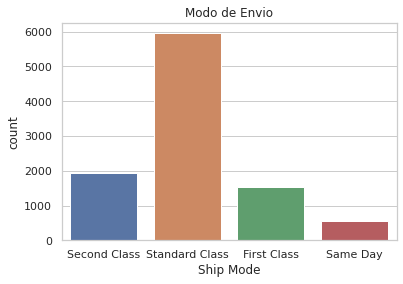

In [56]:
# Plot shipment mode
sns.set_theme(style="whitegrid")
sns.countplot(dados['Ship Mode'])
plt.title("Modo de Envio")
plt.show();

Por um deslizamento de terra, a Por um deslizamento de terra, a Classe Padrão(Standard Class) é o método de envio preferido e talvez o mais barato também. Os outros modos não são populares entre os clientes e podem ser muito caros. é o método de envio preferido e talvez o mais barato também. Os outros modos não são populares entre os clientes e podem ser muito caros.

Qual região é a mais lucrativa?

In [57]:
regiao_lucrativa = pd.DataFrame(dados.groupby(['Region'])['Profit'].sum().reset_index())
regiao_lucrativa

,Region,Profit
0,Central,39655.8752
1,East,91506.3092
2,South,46749.4303
3,West,108329.8079


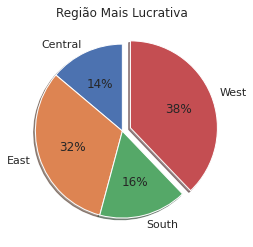

In [58]:
#Grafico de Pizza

explode = [0, 0, 0, 0.1]
plt.pie(regiao_lucrativa.Profit, labels = regiao_lucrativa.Region, startangle = 90, autopct = "%1.0f%%", explode = explode, shadow = True)
plt.title("Região Mais Lucrativa")
plt.show()

As regiões Leste e Oeste são as mais lucrativas.

Qual cidade tem o maior número de vendas?

In [62]:
cidades_vendas = pd.DataFrame(dados.groupby(['City'])['Sales','Quantity'].sum().sort_values('Sales', ascending=False))
top10 = cidades_vendas[:10]
top10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Sales,Quantity
City,,
New York City,256319.0410,3413
Los Angeles,175831.9010,2876
Seattle,119460.2820,1578
San Francisco,112577.1720,1920
Philadelphia,109061.4610,1978
Houston,64441.2564,1460
Chicago,48535.9770,1129
San Diego,47521.0290,670
Jacksonville,44713.1830,429


As 10 principais cidades com vendas mais alta 

In [63]:
cidades_vendas_baixa = cidades_vendas[-10:]
cidades_vendas_baixa

,Sales,Quantity
City,,
Missouri City,6.370,7
Keller,6.000,2
Layton,4.960,4
Springdale,4.300,2
San Luis Obispo,3.620,2
Ormond Beach,2.808,3
Pensacola,2.214,3
Jupiter,2.064,1
Elyria,1.824,1


As 10 cidades com vendas mais baixas

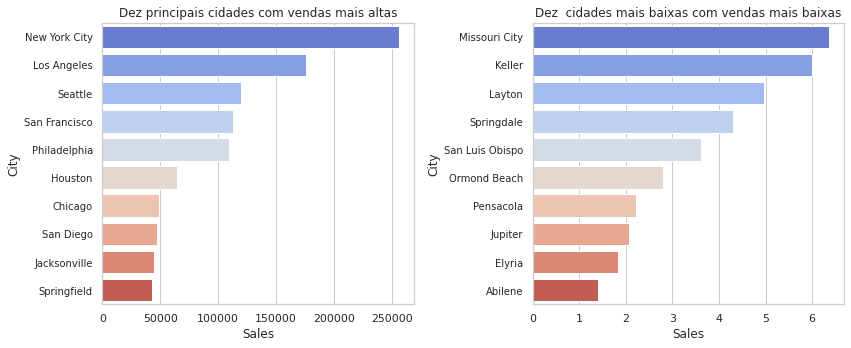

In [65]:
figure, axis = plt.subplots(1, 2, figsize=(12, 5))
sns.set_theme(style="whitegrid")
top10c = sns.barplot(data = top10, y = top10.index, x = top10.Sales, palette = "coolwarm", ax = axis[0])
top10c.set(Title = "Dez principais cidades com vendas mais altas")
top10c.set_yticklabels(top10c.get_yticklabels(),size = 10)

# Plot Bar Plot for Best Selling Sub-Category
bottom10c = sns.barplot(data = cidades_vendas_baixa, y = cidades_vendas_baixa.index, x = cidades_vendas_baixa.Sales, palette = "coolwarm", ax=axis[1])
bottom10c.set(Title = "Dez  cidades mais baixas com vendas mais baixas")
bottom10c.set_yticklabels(bottom10c.get_yticklabels(),size = 10)

# Set spacing between subplots
figure.tight_layout()
plt.show()

Há uma grande disparidade entre as cidades com vendas mais altas e mais baixas. A estratégia de marketing deve ter como alvo as 10 principais cidades.

Recomendação Estratégica


Aqui, revisamos nossas questões comerciais e compartilhamos com você nossas recomendações comerciais de alto nível.


Perguntas de negócios



 * Qual categoria é a mais vendida e mais lucrativa?

 * Quais são as subcategorias mais vendidas e mais lucrativas?

 * Qual é a subcategoria mais vendida?

 * Qual segmento de clientes é mais lucrativo?

 * Qual é o modo de envio preferido?

 * Qual região é a mais lucrativa?





Recomendações 


Concentre-se na subcategoria Tecnologia e nos telefones e cadeiras, visto que são os mais vendidos e mais lucrativos. Agrupe-os com produtos menos lucrativos, como estantes, mesa e cadeiras para compensar as perdas.


A venda de estantes e mesas resulta em enormes perdas, então a Super Store deve considerar agrupá-las com as subcategorias de alta venda ou lucrativos, como cadeiras, copiadoras, telefones e produtos de escritório.


Para clientes de escritórios domésticos, essas pessoas podem estar ocupadas com o trabalho e menos propensas a perder tempo selecionando produtos individuais, então crie um pacote de escritório doméstico com produtos usados ​​para escritórios, como mesa, cadeiras, telefone, copiadoras, armazenamento, etiqueta, fechos, estantes de livros .


Para produtos deficitários como suprimentos, estantes de livros e mesas, considere retirá-los do catálogo ou mudar de fornecedor e barganhar por um preço mais barato.


Os segmentos de consumo e corporativo representam mais de 70% da base de clientes. Direcione-os, especialmente aos clientes das regiões Leste e Oeste nas 10 principais cidades com vendas mais altas, apresentando promoções especiais e pacotes para consumidores e escritórios domésticos e envie e-mails promocionais ou folhetos.